# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
### 1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [143]:
import pandas as pd
import numpy as np
import os 

In [144]:
os.listdir(path='.')

['wrangle_act.ipynb',
 'twitter-archive-enhanced.csv',
 '.DS_Store',
 'Act Report.pdf',
 'figure',
 'Wrangle Report.docx',
 'twitter_api',
 '~$angle Report.docx',
 'twitter_archive_master.csv',
 '.ipynb_checkpoints',
 'Act Report.docx',
 'data',
 'Wrangle Report.pdf']

In [145]:
archive_df = pd.read_csv('data/twitter-archive-enhanced.csv')
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [146]:
archive_df.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

#### 2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [147]:
import requests

In [148]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open('data/image-predictions.tsv', 'wb') as f:
    f.write(r.content)

In [149]:
predictions = pd.read_csv('data/image-predictions.tsv', sep='\t')

#### 3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [150]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
api_key  = 'Y3qdIl0vDvjRoGxktdRqmPlLe'
api_secret = 'A4BDDrKGr6jvRAzV16AXHVNssfuv1B7AD4UiPpyjR778uIYOX3'

access_token = '835972361665019904-HOlIhdMV4ipcGnAfkxaxh7aCxPnxyRv'
access_token_secret = 'SJhP4S2jUWmx6ML6NHiqaRPMbeOPLbGO7Sd4VjSFAerCD'

auth = OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [151]:
print(api.verify_credentials())

User(_api=<tweepy.api.API object at 0x7f9b40347850>, _json={'id': 835972361665019904, 'id_str': '835972361665019904', 'name': 'Riga Wu', 'screen_name': 'RigaWu', 'location': 'Aachen, Germany', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 1, 'friends_count': 100, 'listed_count': 0, 'created_at': 'Sun Feb 26 21:58:37 +0000 2017', 'favourites_count': 17, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 1, 'lang': None, 'status': {'created_at': 'Thu Jun 22 15:50:32 +0000 2023', 'id': 1671908535351795717, 'id_str': '1671908535351795717', 'text': 'RT @Nelzbilli: A must watch🎥\n#OceanGate #Titan #titanicsubmarine #OceansGate \n#submarine #titanicsubmersible  #titanicsub #Titans   #Titani…', 'truncated': False, 'entities': {'hashtags': [{'text': 'OceanGate', 'indices': [29, 39]}, {'text': 'Titan', 'indices': [40, 46]}, {'text': 'titanicsubmarine', 'indices': [47, 64]}, {'text':

In [261]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        #try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        print("Success")
        json.dump(tweet._json, outfile)
        outfile.write('\n')
        #except tweepy.TweepError as e:
            #print("Fail")
            #fails_dict[tweet_id] = e
            #pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193


Forbidden: 403 Forbidden
453 - You currently have access to a subset of Twitter API v2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.twitter.com/en/portal/product

Since I cann't update my current free twitter developer account to a higher level. So I only can use the jason file provided in twitter API section.

In [152]:
# read the json file line by line
df_list = []
with open('data/tweet-json.txt', 'r') as f:
    for line in f:
        tweet = json.loads(line)
        df_list.append({'tweet_id': tweet['id'],
                        'retweet_count': tweet['retweet_count'],
                        'favorite_count': tweet['favorite_count']})
tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [153]:
tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

### archive_df table:

In [154]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [155]:
archive_df.shape

(2356, 17)

The df data contains 2356 rows and 17 columns.

In [156]:
archive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [157]:
# explore the data type and missing values
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [159]:
# check if there are duplicated rows
archive_df.duplicated().sum()

0

In [160]:
archive_df.in_reply_to_status_id.value_counts()

6.671522e+17    2
8.562860e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
               ..
8.482121e+17    1
6.715449e+17    1
6.936422e+17    1
6.849598e+17    1
7.331095e+17    1
Name: in_reply_to_status_id, Length: 77, dtype: int64

In [54]:
archive_df.in_reply_to_user_id.value_counts()

4.196984e+09    47
2.195506e+07     2
7.305050e+17     1
2.916630e+07     1
3.105441e+09     1
2.918590e+08     1
2.792810e+08     1
2.319108e+09     1
1.806710e+08     1
3.058208e+07     1
2.625958e+07     1
1.943518e+08     1
3.589728e+08     1
8.405479e+17     1
2.894131e+09     1
2.143566e+07     1
2.281182e+09     1
1.648776e+07     1
4.717297e+09     1
2.878549e+07     1
1.582854e+09     1
4.670367e+08     1
4.738443e+07     1
1.361572e+07     1
1.584641e+07     1
2.068372e+07     1
1.637468e+07     1
1.185634e+07     1
1.198989e+09     1
1.132119e+08     1
7.759620e+07     1
Name: in_reply_to_user_id, dtype: int64

In [166]:
archive_df.retweeted_status_id

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2351   NaN
2352   NaN
2353   NaN
2354   NaN
2355   NaN
Name: retweeted_status_id, Length: 2356, dtype: float64

In [168]:
# show the retweets in the dataset
archive_df[archive_df.retweeted_status_id.notnull()].shape

(181, 17)

In [55]:
archive_df.retweeted_status_id.value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
               ..
7.848260e+17    1
7.806013e+17    1
8.305833e+17    1
7.047611e+17    1
7.331095e+17    1
Name: retweeted_status_id, Length: 181, dtype: int64

In [56]:
archive_df.retweeted_status_user_id.value_counts()

4.196984e+09    156
4.296832e+09      2
5.870972e+07      1
6.669901e+07      1
4.119842e+07      1
7.475543e+17      1
7.832140e+05      1
7.266347e+08      1
4.871977e+08      1
5.970642e+08      1
4.466750e+07      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
7.874618e+17      1
3.638908e+08      1
5.128045e+08      1
8.117408e+08      1
1.732729e+09      1
1.960740e+07      1
1.547674e+08      1
3.410211e+08      1
7.124572e+17      1
2.804798e+08      1
1.950368e+08      1
Name: retweeted_status_user_id, dtype: int64

In [57]:
archive_df.retweeted_status_timestamp.value_counts()

2016-01-25 00:26:41 +0000    1
2015-11-24 03:51:38 +0000    1
2016-09-22 20:33:42 +0000    1
2016-06-13 18:27:32 +0000    1
2016-09-07 15:44:53 +0000    1
                            ..
2017-06-09 16:22:42 +0000    1
2017-02-28 18:43:57 +0000    1
2017-01-15 21:49:15 +0000    1
2016-12-17 22:43:27 +0000    1
2016-09-27 02:53:48 +0000    1
Name: retweeted_status_timestamp, Length: 181, dtype: int64

In [58]:
archive_df[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [59]:
archive_df.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
           ... 
Clarq         1
General       1
Lucky         1
Maks          1
Superpup      1
Name: name, Length: 957, dtype: int64

In [60]:
archive_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [61]:
archive_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [62]:
archive_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [63]:
archive_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [64]:
archive_df.columns[-4:]

Index(['doggo', 'floofer', 'pupper', 'puppo'], dtype='object')

In *'archive_df'* data, it has 2356 rows and 17 columns. The columns named **in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp** and **expanded_urls** exit missing values. In addition, it has no duplicated rows.
- **tweet_id**: the unique identifier for each tweet ;
- **in_reply_to_status_id**: the statatus id of the reply for this tweet;
- **in_reply_to_user_id**: the user id of the reply for this tweet;
- **timestamp**: the data and time when posting this tweet;
- **source**:the url of this tweet;
- **text**: the text in this tweet. It contains the dog's name, type, birthday, appearance, traits/behavior, rating, and URL, but this information is messy;
- **retweeted_status_id, retweeted_user_id, retweeted_status_timestamp**: the status id, user id, data and time of the retweet for this tweet;
- **expanded_urls**: the url provides expanded information of this tweet;
- **rating_denominator**: The denominator value in this tweet rates the dog. It is an integer ranging from 0 to 170.
- **rating_numerator**: The numerator value in this tweet rates the dog. It is an integer ranging from 0 to 1776. Sometimes, we receive a number where the numerator is larger than the denominator. We should keep it because of the uniqueness of WERATEDDOG.
- **name**: the name of dog in this tweeter. The column currently contains 745 instances with the value "None." Maybe we can try to extract from the tweeter text.
- **doggo, floofer, pupper, puppo** : the various stage of the dog. It refers to the Dogtionary in project motivation section.

### Predication table : 

In [65]:
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [66]:
predictions.shape

(2075, 12)

In [67]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [68]:
predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [69]:
# check if there are duplicated rows
predictions.duplicated().sum()

0

In [70]:
# check the missing values in tweet_id
predictions[predictions.tweet_id.isnull()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


The *'predictions'* data has 2075 rows and 12 columns.It has no missing value.
- **tweet_id**: the unique identifier for each tweet;
- **jpg_url**: The dog image URLs serve as inputs to the neural network;
- **img_num**: the number of dog images in each url.Note that some urls have more than 1 dog image;
- **p1,p2,p3**: The predicted dog breed is determined by the neural network provided by the project;
- **p1_conf,p2_conf,p3_conf**: the confidence interval of the predicted dog breed;
- **p1_dog,p2_dog,p3_dog**: The "true/false" in this column indicates whether the predicted dog breed matches the actual dog breed in the image.

### Tweets table:

In [71]:
tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [72]:
tweets.shape

(2354, 3)

In [73]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [74]:
tweets.duplicated().sum()

0

In [75]:
# check if there are any missing values in tweets
tweets[tweets.tweet_id.isnull()]

,tweet_id,retweet_count,favorite_count


In [76]:
tweets.retweet_count.value_counts()

1972     5
3652     5
83       5
146      4
61       4
        ..
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

In [77]:
tweets.favorite_count.value_counts()

0        179
610        3
345        3
2918       3
1691       3
        ... 
33345      1
814        1
23108      1
2630       1
8143       1
Name: favorite_count, Length: 2007, dtype: int64

The *'tweeets'* data is jason data gather from twitter. It has 2354 rows and 3 columns and no missing or duplicated value.
- **tweet_id**: the unique identifier for each tweet;
- **retweet_count**:The number of times each tweet has been retweeted;
- **favorite_count**: The number of times each tweet has been marked as favorited.


### Quality issues(completeness, validity, accuracy, and consistency)

In *archive_df* table: 

1. Merge the *archive_df* and *tweets* tables using the tweet_id column and filter *archive_df* to keep only the rows where the **tweet_id** is present in *tweets*;

2. Remove the column related retweet and in reply tweeter in *archive_df* table;

3. extract the name from **text** column and replace the invalid name in **name** column;

4. comparing **denominator** and **numerator** columns with extracted values and filtering invalid rating scores;  

5. Remove "+0000" in **timestamp** column *archive_df* table and change it into datetime; 

6. Drop unnecessary **expanded_url** columns;

In *prediction* table:

7. merge the prediction table and df_clean table.

### Tidiness issues
In *archive_df* table: 

1. Column **doggo, floofer, pupper, puppo** present the stage of the dog, so change them in a categarical coloum named dog stage;

2. Column **rating_numerator，rating_denominator** convert into factional form in one column named rating score of the dog;

3. Combining Predicted Dog Breed and Confidence;

4. extract the source of the tweet in **source** columns.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [174]:
# Make copies of original pieces of data
archive_df_clean = archive_df.copy()
predictions_clean = predictions.copy()
tweets_clean = tweets.copy()

### Issue #1: Merge the *archive_df* and *tweets* tables

#### Define: Merge the *archive_df* and *tweets* tables using the **tweet_id** column and filter *archive_df* to keep only the rows where the **tweet_id** is present in tweets.

#### Code

In [208]:
# Merge the three datasets on 'tweet_id'
df_clean = pd.merge(left=archive_df, right=tweets_clean, left_on='tweet_id', right_on='tweet_id', how='inner')
# pd.merge(....,how = 'inner') will keep only the tweet_ids that are present in both dataframes
# similar SQL code : SELECT * FROM archive_df  INNER JOIN tweets_clean ON archive_df.tweet_id = tweets_clean.tweet_id;

#### Test

In [209]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,9774,41048


### Issue #2: Remove the retweet and in_reply information an in reply columns 

#### Define: drop the column **retweeted_status_id, retweeted_user_id, retweeted_status_timestamp** and **in_reply_to_status_id, in_reply_to_user_id** in merged table, which includes *archive_df* and *tweets* table by dropping these three columns.

#### Code

In [210]:
df_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8853,39467


In [211]:
drop_cols = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
df_clean.drop(drop_cols, axis=1, inplace=True)

#### Test

In [212]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8853,39467
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6514,33819
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,4328,25461
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,8964,42908
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,9774,41048


### Issue 3: extract the name from **text** column and replace the invalid name in **name** column

#### Define: extract the correct name from the **text** column. The name indicator is "This is" and the first letter in the extracted name should be uppercase and then drop the row which have the Nan value in **name** column.  

#### Code:

In [213]:
df_clean['name'] = df_clean['text'].str.extract(r'This is ([A-Z][a-z]+)')

#### Test:

In [214]:
df_clean['name'].value_counts()

Lucy       10
Cooper      9
Penny       9
Bo          9
Tucker      9
           ..
Rupert      1
Damon       1
Steve       1
Duchess     1
Bones       1
Name: name, Length: 762, dtype: int64

In [215]:
# check the missing values in name
df_clean[df_clean.name.isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,None,None,None,None,3261,20562
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,NaN,None,None,None,None,2158,12041
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,None,None,None,None,16716,56848
12,889665388333682689,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,NaN,None,None,None,puppo,8538,38818
21,887517139158093824,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,10,NaN,None,None,None,None,12082,46959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,None,None,None,None,41,111
2350,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,None,None,None,None,147,311
2351,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,None,None,None,None,47,128
2352,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,None,None,None,None,48,132


In [216]:
# drop the rows with missing values in name
df_clean = df_clean[df_clean.name.notnull()]

In [217]:
# test
df_clean['name'].isnull().sum()

0

### Issue 4: comparing **denominator** and **numerator** columns with extracted values and filtering invalid rating scores

The rating_numerator column contains unusually large values, but the project has emphasized the importance of retaining these values. They represent unique ratings given by WERATEDOG and reflect people's love for dogs.

In [218]:
df_clean['rating_numerator'].value_counts()

12      310
11      262
10      210
13      169
9        67
8        56
7        28
14       15
6        12
5        12
3         8
4         5
2         3
75        2
27        1
50        1
1776      1
Name: rating_numerator, dtype: int64

The numerator column contains some unususal large values. But the project instruction has point out they represent people's favorite for the dog. We should keep them.

In [219]:
df_clean['rating_denominator'].value_counts()

10    1160
50       1
11       1
Name: rating_denominator, dtype: int64

The **rating_denominator** column has unusual value: 50 and 11. They should be checked if they are equal to the extracted value from the **text** column.

#### Define:

1. Extracting the numerator and denominator from the **text** column and change the string to float;
2. Comparing values of the **denominator** and **numerator** column and the corresponding extracted denominator and dropping the different rows;
3. Finding the rows which the denominators are not equal to 10 and dropping these corresponding rows.

#### Code:

In [220]:
# extract the rating scores from the text column
df_clean['extracted_rating_numerator'] = df_clean['text'].str.extract(r'(\d+\.?\d?\d?)\/(\d{1,3})', expand = True)[0].astype('float')
df_clean['extracted_rating_denominator'] = df_clean['text'].str.extract(r'(\d+\.?\d?\d?)\/(\d{1,3})', expand = True)[1].astype('float')

In [221]:
# calculate the number of rows which show different value between the extracted rating numerator and the original rating numerator
(df_clean['extracted_rating_numerator']!=df_clean['rating_numerator']).sum()

4

In [222]:
# show the rows which show different value between the extracted rating numerator and the original rating numerator 
df_clean['compare_result'] = [x['rating_numerator'] == x['extracted_rating_numerator'] for _, x in df_clean.iterrows()]
df_clean[df_clean['compare_result'] == False]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,extracted_rating_numerator,extracted_rating_denominator,compare_result
44,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None,10407,46860,13.50,10.0,False
339,832215909146226688,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None,7069,0,9.75,10.0,False
694,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None,7069,20296,9.75,10.0,False
762,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None,1885,7320,11.27,10.0,False


In [223]:
# drop the rows which show different value between the extracted rating numerator and the original rating numerator
df_clean.drop(df_clean[df_clean['compare_result'] == False].index, inplace=True)

In [224]:
# test the different rows has been dropped
(df_clean['extracted_rating_numerator']!=df_clean['rating_numerator']).sum()

0

In [225]:
# drop the columns which are not needed anymore
df_clean.drop(['compare_result'], axis=1, inplace=True)
df_clean.drop(['extracted_rating_numerator','extracted_rating_denominator'], axis=1, inplace=True)

In [227]:
#test
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8853,39467
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6514,33819
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,4328,25461
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,8964,42908
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,9774,41048


In [228]:
# check the rows with rating_denominator not equal to 10
df_clean[df_clean['rating_denominator'] != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
1200,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None,247,2574
1660,682962037429899265,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None,15043,26239


In [229]:
# drop the rows with rating_denominator not equal to 10
df_clean.drop(df_clean[df_clean['rating_denominator'] != 10].index, inplace=True)

In [230]:
# test
df_clean[df_clean['rating_denominator'] != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count


### Issue 5: remove "+0000" in **timestamp** column *archive_df* table and change it into datetime

In [231]:
# remove "+0000" from the timestamp column and change the data type to datetime
df_clean['timestamp'] = df_clean['timestamp'].str[:-6]
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

In [232]:
df_clean['timestamp'].head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

### Issue 6: Drop the unnecessary **expanded_url** columns

In [233]:
# drop the expanded_urls column
df_clean.drop(['expanded_urls'], axis=1, inplace=True)

In [234]:
# test 
df_clean.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,8853,39467


### Issue 7: merge the prediction table and df_clean table 

#### Define: Remove the row in *prediction* table whose **tweet_id** column do not match with the merged *df_clean* table.

In [235]:
# drop the rows in predictions_clean which is not in df_clean
predictions_clean.drop(predictions_clean[predictions_clean.tweet_id.isin(df_clean.tweet_id) == False].index, inplace=True)

In [236]:
# merge the predictions_clean with df_clean
archive_df_master = pd.merge(left=df_clean, right=predictions_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

#### Test:

In [237]:
archive_df_master.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Tidinies issure 1: Convert the columns **dogg, floofer, pupper,** and **puppo** into a single categorical column named **dog_stage**.

#### Define: 1. convert the columns **dogg, floofer, pupper,** and **puppo** into a single categorical column named **dog_stage**;  2. replace the blank in **dog_stage** with None;3. delete the rows with multi dog stage.

In [238]:
archive_df_master.replace('None', value=np.nan, inplace=True)
archive_df_master['dog_stage'] = archive_df_master[['doggo', 'floofer', 'pupper', 'puppo']].apply(
    lambda x: ','.join(x.dropna().astype(str)), axis=1)
archive_df_master.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
243,814986499976527872,2016-12-31 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. Someone attacked him with a sh...,11,10,Cooper,NaN,NaN,pupper,...,dalmatian,0.999828,True,boxer,0.000068,True,American_Staffordshire_terrier,0.000034,True,pupper
527,749036806121881602,2016-07-02 00:27:45,"<a href=""http://twitter.com/download/iphone"" r...",This is Dietrich. He hops at random. Other dog...,8,10,Dietrich,NaN,NaN,NaN,...,sulphur-crested_cockatoo,0.960276,False,West_Highland_white_terrier,0.019522,True,Samoyed,0.006396,True,
377,784826020293709826,2016-10-08 18:41:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Rusty. He's going D1 for sure. Insane ...,13,10,Rusty,NaN,NaN,NaN,...,chow,0.090341,True,binoculars,0.083499,False,Irish_setter,0.077456,True,
891,674410619106390016,2015-12-09 02:09:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Lenny. He wants to be a sprinkler. 10/...,10,10,Lenny,NaN,NaN,NaN,...,brown_bear,0.698207,False,sea_lion,0.046475,False,beagle,0.019427,True,
513,750506206503038976,2016-07-06 01:46:38,"<a href=""http://twitter.com/download/iphone"" r...",This is Malcolm. He's absolutely terrified of ...,8,10,Malcolm,NaN,NaN,pupper,...,American_black_bear,0.219166,False,lesser_panda,0.214715,False,titi,0.091685,False,pupper


In [239]:
# test
archive_df_master['dog_stage'].value_counts()

                935
pupper           89
doggo            33
puppo            14
doggo,pupper      3
floofer           3
Name: dog_stage, dtype: int64

In [240]:
# replace the empty string with NaN
archive_df_master['dog_stage'].replace('', 'None', inplace=True)

In [241]:
# test
archive_df_master['dog_stage'].value_counts()

None            935
pupper           89
doggo            33
puppo            14
doggo,pupper      3
floofer           3
Name: dog_stage, dtype: int64

In [242]:
# investigate the rows with multiple dog stages
archive_df_master[archive_df_master['dog_stage'].str.contains(',')]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
231,817777686764523521,2017-01-07 16:59:28,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",13,10,Dido,doggo,NaN,pupper,...,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,"doggo,pupper"
297,801115127852503040,2016-11-22 17:28:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,12,10,Bones,doggo,NaN,pupper,...,dalmatian,0.823356,True,English_setter,0.094602,True,bluetick,0.021953,True,"doggo,pupper"
373,785639753186217984,2016-10-11 00:34:48,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,10,10,Pinot,doggo,NaN,pupper,...,porcupine,0.978042,False,sea_urchin,0.006106,False,echidna,0.005442,False,"doggo,pupper"


In [243]:
# try to extract the dog stage from the text column
archive_df_master[archive_df_master['dog_stage'].str.contains(',')].text

231    This is Dido. She's playing the lead role in "...
297    This is Bones. He's being haunted by another d...
373    This is Pinot. He's a sophisticated doggo. You...
Name: text, dtype: object

There's no clue about the dog stage. We can just drop these rows with mixed dog stage.

In [244]:
# drop the rows with multiple dog stages
archive_df_master.drop(archive_df_master[archive_df_master['dog_stage'].str.contains(',')].index, inplace=True)

In [245]:
# drop the doggo, floofer, pupper, puppo columns
archive_df_master.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test:

In [246]:
# test
archive_df_master.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None


### Tidiness issues 2: the **rating_numerator，rating_denominator** conlumns convert into factional form in one column named rating score of the dog.

#### Define:

In [247]:
# convert the ratting numerator and denominator into rating score
archive_df_master['rating_score'] = archive_df_master['rating_numerator'] / archive_df_master['rating_denominator']

In [248]:
# drop the rating_numerator and rating_denominator columns
archive_df_master.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

#### Test:

In [249]:
archive_df_master.head(3)

,tweet_id,timestamp,source,text,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating_score
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Phineas,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None,1.3
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None,1.3
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,Archie,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None,1.2


### Issue 3: Combining Predicted Dog Breed and Confidence
#### Define: merge the predicted dog breed values from 'p1', 'p2', and 'p3' columns, along with their corresponding confidence, into a single column called 'dog_breed'.

In [250]:
archive_df_master.head(3)

,tweet_id,timestamp,source,text,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating_score
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Phineas,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None,1.3
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None,1.3
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,Archie,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None,1.2


In the table merged the image prediction table, the "image number" column indicates the most confident prediction, with values ranging from 1 to 4, as tweets can contain up to four images. For example, if the "img_num" is 1, it corresponds to the maximum prediction confidence represented by the "p1" column. Therefore, to conduct further analysis, we should select the "img_num" that corresponds to the prediction with the highest confidence and use its associated value from the "p" columns as the "prediction confidence" for further evaluation.

In [251]:
# setup the conditions for selection
conditions = [(archive_df_master['p1_dog'] == True),
              (archive_df_master['p2_dog'] == True),
              (archive_df_master['p3_dog'] == True)]

# setup the choices for selection
choices = [archive_df_master['p1'], archive_df_master['p2'], archive_df_master['p3']]
# select the dog breed according to the conditions and choices
archive_df_master['dog_breed'] = np.select(conditions, choices, default='None')
# set the choice order for confidence level based on the selection conditions
choices_confidence = [archive_df_master['p1_conf'], 
                      archive_df_master['p2_conf'], 
                      archive_df_master['p3_conf']]

# select the predicted confidence level based on the first successful condition
archive_df_master['confidence'] = np.select(conditions, choices_confidence, 
                                            default = 0)

In [252]:
# test
archive_df_master.head()

,tweet_id,timestamp,source,text,name,retweet_count,favorite_count,jpg_url,img_num,p1,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating_score,dog_breed,confidence
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Phineas,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,...,bagel,0.085851,False,banana,0.076110,False,None,1.3,None,0.000000
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,...,Pekinese,0.090647,True,papillon,0.068957,True,None,1.3,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,Archie,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,...,malamute,0.078253,True,kelpie,0.031379,True,None,1.2,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,Darla,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,None,1.3,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,Franklin,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None,1.2,basset,0.555712


In [253]:
# drop p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog columns
archive_df_master.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog',
                        'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)
# test
archive_df_master.head()

,tweet_id,timestamp,source,text,name,retweet_count,favorite_count,jpg_url,img_num,dog_stage,rating_score,dog_breed,confidence
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Phineas,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,None,1.3,None,0.000000
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,None,1.3,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,Archie,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,None,1.2,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,Darla,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,None,1.3,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,Franklin,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,None,1.2,basset,0.555712


### Tidiness Issue 4: extract the source of the tweet in **source** columns

In [254]:
archive_df_master.head(1)

,tweet_id,timestamp,source,text,name,retweet_count,favorite_count,jpg_url,img_num,dog_stage,rating_score,dog_breed,confidence
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Phineas,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,None,1.3,None,0.0


In [255]:
df_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1102
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          39
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       10
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       5
Name: source, dtype: int64

In [256]:
# extract the source from the source column
df_clean['source'] = df_clean['source'].str.split('>').str[1].str.split('<').str[0]

In [257]:
# test the source column
df_clean['source'].value_counts()

Twitter for iPhone     1102
Vine - Make a Scene      39
Twitter Web Client       10
TweetDeck                 5
Name: source, dtype: int64

In [258]:
# test if the source column have missing values
df_clean[df_clean['source'].isnull()]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [259]:
archive_df_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [131]:
df = pd.read_csv('twitter_archive_master.csv')

In [132]:
df.head()

,tweet_id,timestamp,source,text,name,retweet_count,favorite_count,jpg_url,img_num,dog_stage,rating_score,dog_breed,confidence
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,None,1.3,None,0.000000
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,None,1.3,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,None,1.2,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,Darla,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,None,1.3,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,Franklin,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,None,1.2,basset,0.555712


### Insights:

1. Which stage of dog received the highest rating score?

2. Which dog breed type has the highest count in Twitter?

3. How does the posting trend of WeRateDogs vary over time?

### Visualization

#### Question 1: Which stage of dog received the highest rating score?

In [133]:
import matplotlib.pyplot as plt

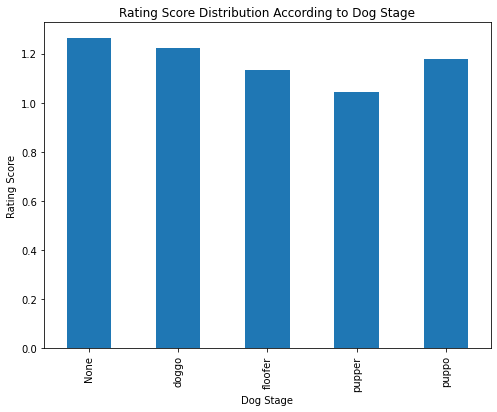

In [134]:
# plot the rating score distribution accoding to the dog stage
df.groupby('dog_stage')['rating_score'].mean().plot(kind='bar', figsize=(8, 6))
plt.title('Rating Score Distribution According to Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Rating Score')
plt.savefig('figure/rating_score_distribution_according_to_dog_stage.png')

Based on the provided plot, it can be concluded that the dog stage labeled as "None" received the highest rating score. However, among the known dog stages, the "doggo" stage appeared to have the highest rating score. 

### Question 2: Which dog breed type has the highest count in Twitter?

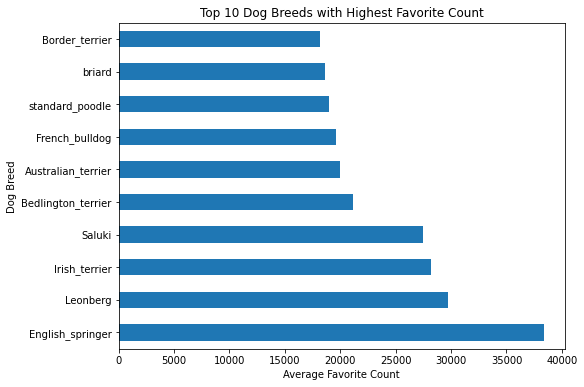

In [135]:
# which type of dog breed received the most favoratie count? 
# plot the horizontal bar chart
archive_df_master.groupby('dog_breed')['favorite_count'].mean().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(8, 6))
plt.title('Top 10 Dog Breeds with Highest Favorite Count')
plt.xlabel('Average Favorite Count')
plt.ylabel('Dog Breed')
plt.savefig('figure/top_10_dog_breeds_with_highest_favorite_count.png')

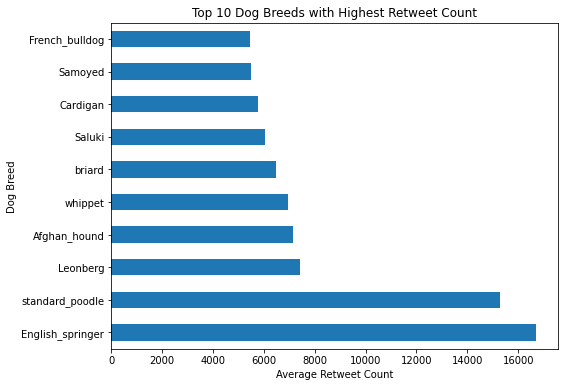

In [136]:
# which type of dog breed received the most retweet count?
# plot the horizontal bar chart
archive_df_master.groupby('dog_breed')['retweet_count'].mean().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(8, 6))
plt.title('Top 10 Dog Breeds with Highest Retweet Count')
plt.xlabel('Average Retweet Count')
plt.ylabel('Dog Breed')
plt.savefig('figure/top_10_dog_breeds_with_highest_retweet_count.png')

In [137]:
# show the ovelap dog breed between the top 10 dog breeds with highest favorite count and the top 10 dog breeds with highest retweet count
archive_df_master.groupby('dog_breed')['retweet_count'].mean().sort_values(ascending=False).head(10).index.intersection(archive_df_master.groupby('dog_breed')['favorite_count'].mean().sort_values(ascending=False).head(10).index)

Index(['English_springer', 'standard_poodle', 'Leonberg', 'briard', 'Saluki',
       'French_bulldog'],
      dtype='object', name='dog_breed')

Since there is two count : favorite_count and retweet_count, representing the favorite count. Considering these two plots, we conclude that English Spinger is the most favorite count dog breed in WERATEDOG tweet. The Standard_poodle, Leonberg, briard,Saluki,French_bulldog are listed in top 10 favorite dog breed.

#### Question 4: How does the posting trend of WeRateDogs vary over time?

In [138]:
# convert the timestamp column to datetime type
df['timestamp'] = pd.to_datetime(archive_df_master['timestamp'])

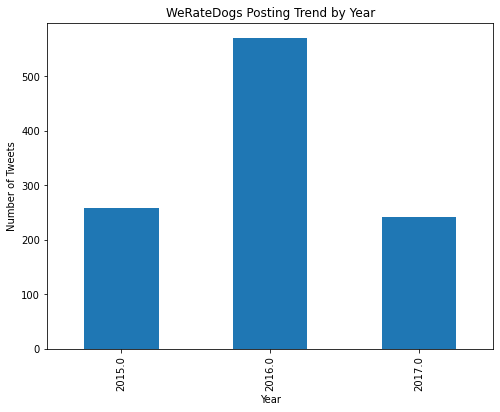

In [139]:
# # What is WeRateDogs's posting trend by year?
# # plot the line chart
df['year'] = df['timestamp'].dt.year
df.groupby('year')['tweet_id'].count().plot(kind='bar', figsize=(8, 6))
plt.title('WeRateDogs Posting Trend by Year')
plt.xlabel('Year')
plt.ylabel('Number of Tweets')
plt.savefig('figure/WeRateDogs_posting_trend_by_year.png')

From above analysis, we observe that the WeRateDogs account has posted a significantly varying number of tweets each year. In 2016, the maximum number of tweets was more than double the number in both 2015 and 2017. Additionally, the number of tweets in 2015 slightly exceeded the number in 2017.

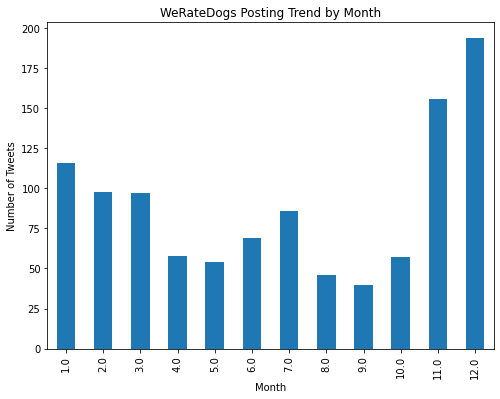

In [140]:
# What is WeRateDogs's posting trend by month
# plot the line chart
df['month'] = df['timestamp'].dt.month
df.groupby('month')['tweet_id'].count().plot(kind='bar', figsize=(8, 6))
plt.title('WeRateDogs Posting Trend by Month')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.savefig('figure/WeRateDogs_posting_trend_by_month.png')

The posting trend by month shows significant variations in the number of tweets. The months of October and December have the highest number of tweets, whereas the summer months of August and September experience the lowest points in terms of tweet activity.

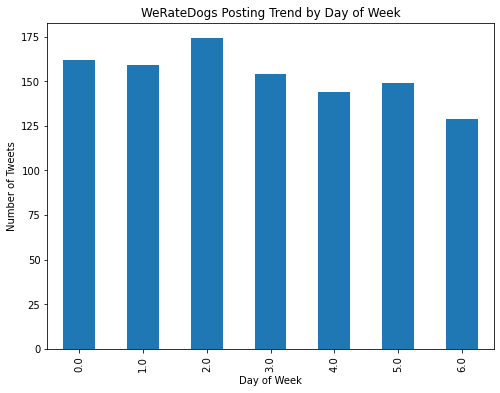

In [141]:
# What is WeRateDogs's posting trend by day of week?
# plot the line chart
df['day_of_week'] = df['timestamp'].dt.dayofweek
df.groupby('day_of_week')['tweet_id'].count().plot(kind='bar', figsize=(8, 6))
plt.title('WeRateDogs Posting Trend by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Tweets')
plt.savefig('figure/WeRateDogs_posting_trend_by_day_of_week.png')

The number of tweets posted per day exhibits slightly variation, only showing a small posting peak on Tuesday.